<h1 style="text-align:center">Two-link Planar Robot Arm</h1>
<p style="text-align:center">Dr. Joshua Vaughan <br>
<a href="mailto:joshua.vaughan@louisiana.edu">joshua.vaughan@louisiana.edu</a><br>
<a href="http://www.ucs.louisiana.edu/~jev9637/">http://www.ucs.louisiana.edu/~jev9637/</a></p>

We solved for the equations of motion fo this system using [SymPy](http://sympy.org) in [another notebook](http://nbviewer.jupyter.org/github/DocVaughan/CRAWLAB-Code-Snippets/blob/master/SymPy/Two%20Link%20Planar%20Arm.ipynb). Here, we'll use [NumPy](http://numpy.org) and the [SciPy](http://www.scipy.org) ode solver, ```ode``` to simulate the system. We'll use [matplotlib](http://www.scipy.org) to plot of the results.

In [1]:
# import NumPy with namespace np
import numpy as np

# import the scipy ODE solver
from scipy.integrate import odeint

# import the plotting functions from matplotlib
import matplotlib.pyplot as plt

# set up the notebook to display the plots inline
%matplotlib inline

In [2]:
def tau_1(w, t, p):
    """ 
    Torque at the shoulder joint. Here is is a simple PD controller on joint angle, 
    using a derivative on measurement D term
    """
    theta_1, theta_2, theta_1_dot, theta_2_dot = w
    m_1, m_2, l_1, l_2, I_1, I_2, theta_1_des, theta_2_des, kp, kd = p
    
    return kp * (theta_1_des - theta_1) + kd * (-theta_1_dot)

def tau_2(w, t, p):
    """ 
    Torque at the shoulder joint. Here is is a simple PD controller on joint angle, 
    using a derivative on measurement D term
    """
    theta_1, theta_2, theta_1_dot, theta_2_dot = w
    m_1, m_2, l_1, l_2, I_1, I_2, theta_1_des, theta_2_des, kp, kd = p
    
    return kp * (theta_2_des - theta_2) + kd * (-theta_2_dot)   

In [7]:
def eq_of_motion(w, t, p):
    """ Equations of motion for the two link system"""
    
    theta_1, theta_2, theta_1_dot, theta_2_dot = w
    m_1, m_2, l_1, l_2, I_1, I_2, theta_1_des, theta_2_des, kp, kd = p
    
    sys_ode = [theta_1_dot,
               theta_2_dot,
               2*(4*I_2*l_1*l_2*m_2*np.sin(theta_2)*theta_1_dot**2 + 8*I_2*l_1*l_2*m_2*np.sin(theta_2)*theta_1_dot*theta_2_dot + 4*I_2*l_1*l_2*m_2*np.sin(theta_2)*theta_2_dot**2 + 8*I_2*tau_1(w, t, p) - 8*I_2*tau_2(w, t, p) + l_1**2*l_2**2*m_2**2*np.sin(2*theta_2)*theta_1_dot**2 + l_1*l_2**3*m_2**2*np.sin(theta_2)*theta_1_dot**2 + 2*l_1*l_2**3*m_2**2*np.sin(theta_2)*theta_1_dot*theta_2_dot + l_1*l_2**3*m_2**2*np.sin(theta_2)*theta_2_dot**2 - 4*l_1*l_2*m_2*tau_2(w, t, p)*np.cos(theta_2) + 2*l_2**2*m_2*tau_1(w, t, p) - 2*l_2**2*m_2*tau_2(w, t, p))/(l_1**2*(4*I_2*m_1 + 16*I_2*m_2 + l_2**2*m_1*m_2 + 4*l_2**2*m_2**2*np.sin(theta_2)**2)),
               -(2*(4*I_2 + l_2*m_2*(2*l_1*np.cos(theta_2) + l_2))*(l_1*l_2*m_2*(2*theta_1_dot + theta_2_dot)*np.sin(theta_2)*theta_2_dot + 2*tau_1(w, t, p)) + 2*(l_1*l_2*m_2*np.sin(theta_2)*theta_1_dot**2 - 2*tau_2(w, t, p))*(4*I_2 + l_1**2*m_1 + m_2*(4*l_1**2 + 4*l_1*l_2*np.cos(theta_2) + l_2**2)))/(l_1**2*(4*I_2*m_1 + 16*I_2*m_2 + l_2**2*m_1*m_2 + 4*l_2**2*m_2**2*np.sin(theta_2)**2))]
    
    return sys_ode

In [119]:
# Set up the initial conditions for the solver
theta1_init = 90.0 * np.pi/180  # Initial angle (rad)
theta1_dot_init = 0.0           # Initial angular velocity (rad/s)
theta2_init = 0.0 * np.pi/180  # Initial angle (rad)
theta2_dot_init = 0.0           # Initial angular velocity (rad/s)

# Pack the initial conditions into an array
x0 = [theta1_init, theta2_init, theta1_dot_init, theta2_dot_init]

# Define the numerical values for all the system constants
# and pack them into a list for passing
m1 = 10.0
m2 = 10.0
l1 = 2.0
l2 = 2.0 
I1 = 1/12 * m1 * l1**2
I2 = 1/12 * m2 * l2**2

# Define the desired shoulder and elbow angles
theta_1_des = 60 * np.pi/180
theta_2_des = 60 * np.pi/180

# Set the P and D gains. 
# NOTE: The values here are *not* optimal and were somewhat aribtrarily chosen.
#       They need to be tuned. The system should also probably use different
#       gains on the two joints. The code here uses the same for both to simplify.
kp = 500
kd = 100

p = [m1, m2, l1, l2, I1, I2, theta_1_des, theta_2_des, kp, kd]

# Create the time samples for the output of the ODE solver
sim_time = np.linspace(0.0, 5.0, 5001) # 0-10s with 1001 points in between

In [120]:
# ODE solver parameters
abserr = 1.0e-9
relerr = 1.0e-9
max_step = 0.01

# Call the ODE solver.
resp = odeint(eq_of_motion, x0, sim_time, args=(p,), atol=abserr, rtol=relerr,  hmax=max_step)

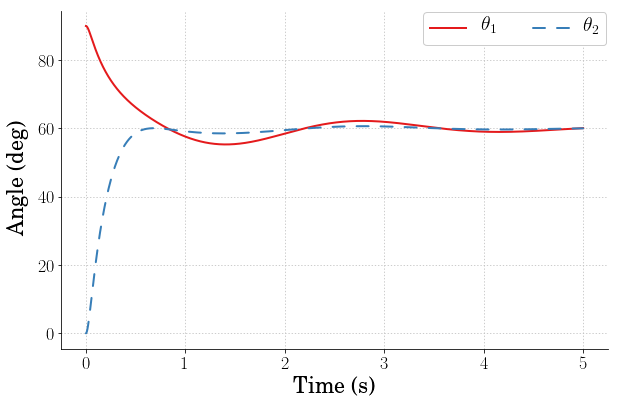

In [121]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

# Remove top and right axes border
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Only show axes ticks on the bottom and left axes
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Time (s)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Angle (deg)', family='serif', fontsize=22, weight='bold', labelpad=10)

# Plot the data
plt.plot(sim_time, resp[:, 0] * 180/np.pi, linewidth=2, linestyle='-', label = r'$\theta_1$')
plt.plot(sim_time, resp[:, 1] * 180/np.pi, linewidth=2, linestyle='--', label = r'$\theta_2$')

# uncomment below and set limits if needed
# plt.xlim(0, 5)
# plt.ylim(-1, 5)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 2, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('TwoLinkArm_AngularResponse.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

In [122]:
# Now, let's define the planar positions of the elbow joint and endpoint
# Then, we'll plot them on a planar representation of the workspace
elbow_x = l1 * np.cos(resp[:,0])
elbow_y = l1 * np.sin(resp[:,0])
end_x = elbow_x + l2 * np.cos(resp[:,0] + resp[:,1])
end_y = elbow_y + l2 * np.sin(resp[:,0] + resp[:,1])

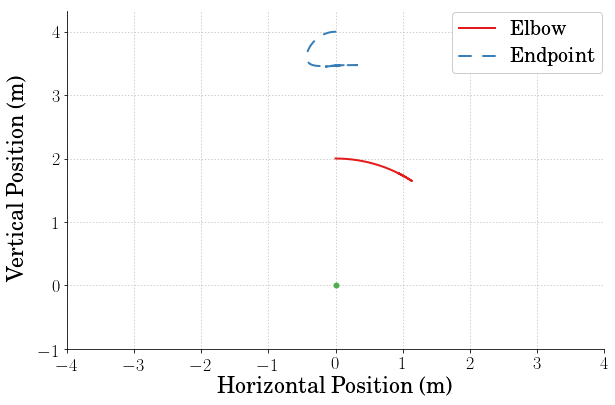

In [123]:
# Set the plot size - 3x2 aspect ratio is best
fig = plt.figure(figsize=(6, 4))
ax = plt.gca()
plt.subplots_adjust(bottom=0.17, left=0.17, top=0.96, right=0.96)

# Change the axis units to serif
plt.setp(ax.get_ymajorticklabels(), family='serif', fontsize=18)
plt.setp(ax.get_xmajorticklabels(), family='serif', fontsize=18)

# Remove top and right axes border
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Only show axes ticks on the bottom and left axes
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Turn on the plot grid and set appropriate linestyle and color
ax.grid(True,linestyle=':', color='0.75')
ax.set_axisbelow(True)

# Define the X and Y axis labels
plt.xlabel('Horizontal Position (m)', family='serif', fontsize=22, weight='bold', labelpad=5)
plt.ylabel('Vertical Position (m)', family='serif', fontsize=22, weight='bold', labelpad=10)

# Plot the data
plt.plot(elbow_x, elbow_y, linewidth=2, linestyle='-', label = r'Elbow')
plt.plot(end_x, end_y, linewidth=2, linestyle='--', label = r'Endpoint')
plt.plot(0,0, linestyle='', marker='o', markersize=5, label ='', zorder = 99)

# uncomment below and set limits if needed
plt.xlim(-4, 4)
plt.ylim(-1, 4+1/3)

# Create the legend, then fix the fontsize
leg = plt.legend(loc='upper right', ncol = 1, fancybox=True)
ltext  = leg.get_texts()
plt.setp(ltext, family='serif', fontsize=20)

# Adjust the page layout filling the page using the new tight_layout command
plt.tight_layout(pad=0.5)

# Uncomment to save the figure as a high-res pdf in the current folder
# It's saved at the original 6x4 size
# plt.savefig('TwoLinkArm_PlanarResponse.pdf')

fig.set_size_inches(9, 6) # Resize the figure for better display in the notebook

<hr class = "style-end">

#### Licenses
Code is licensed under a 3-clause BSD style license. See the licenses/LICENSE.md file.

Other content is provided under a [Creative Commons Attribution-NonCommercial 4.0 International License](http://creativecommons.org/licenses/by-nc/4.0/), CC-BY-NC 4.0.

In [78]:
# This cell will just improve the styling of the notebook
# You can ignore it, if you are okay with the default sytling
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen("https://cl.ly/1B1y452Z1d35")
HTML(response.read().decode("utf-8"))